In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
import datetime as dt

In [2]:
end=dt.datetime.now()
start=dt.datetime(end.year-10,end.month,end.day)
price=reader.get_data_yahoo('Ko',start,end)['Adj Close']
price=pd.DataFrame(price)
price

,Adj Close
Date,
2012-09-04,27.234737
2012-09-05,27.402758
2012-09-06,27.870317
2012-09-07,27.687679
2012-09-10,27.512348
...,...
2022-08-29,62.730000
2022-08-30,62.150002
2022-08-31,61.709999


In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-09-04 to 2022-09-02
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [4]:
df=price.reset_index()
df

,Date,Adj Close
0,2012-09-04,27.234737
1,2012-09-05,27.402758
2,2012-09-06,27.870317
3,2012-09-07,27.687679
4,2012-09-10,27.512348
...,...,...
2512,2022-08-29,62.730000
2513,2022-08-30,62.150002
2514,2022-08-31,61.709999
2515,2022-09-01,62.000000


In [5]:
df.isnull().sum()

Date         0
Adj Close    0
dtype: int64

In [6]:
df=df.groupby('Date').sum()#when we have two transiction in a single day. so we sum all the entry for one day
df

,Adj Close
Date,
2012-09-04,27.234737
2012-09-05,27.402758
2012-09-06,27.870317
2012-09-07,27.687679
2012-09-10,27.512348
...,...
2022-08-29,62.730000
2022-08-30,62.150002
2022-08-31,61.709999


In [7]:
df_w=df.resample(rule='D').mean()#same job weekly process
df_w

,Adj Close
Date,
2012-09-04,27.234737
2012-09-05,27.402758
2012-09-06,27.870317
2012-09-07,27.687679
2012-09-08,NaN
...,...
2022-08-29,62.730000
2022-08-30,62.150002
2022-08-31,61.709999


In [8]:
df[0:4].sum()#other 3 day market was close

Adj Close    110.195492
dtype: float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2012-09-04 to 2022-09-02
Freq: D
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3651 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


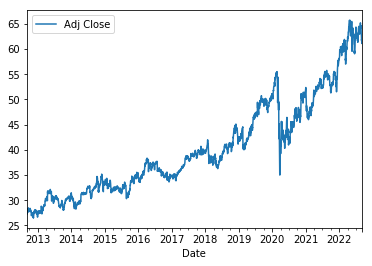

In [9]:
df_w.isnull().sum()
df=df_w['Adj Close'].interpolate(method="linear")#method time still there
df.isnull().sum()
df=pd.DataFrame(df)
df=df.resample(rule='D').mean()#same job weekly process
df.info()
df.plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
stl=seasonal_decompose(df['Adj Close'],model='mul',period=800)
Result = stl

In [11]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid
df['trend']=trend
df['Seasonality']=seasonal

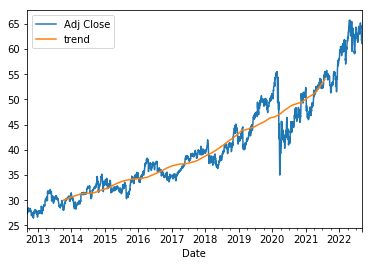

In [12]:
df[['Adj Close','trend']].plot()

In [13]:
#train=df[:-365]#till july07
#test=df[-365:]
train=df.dropna()

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
#Holt Winters Model
hwmodel=ExponentialSmoothing(train['trend'],trend='mul',seasonal=None,seasonal_periods=None).fit()

In [16]:
test_pred=hwmodel.forecast(400)
test_pred

2021-07-30    54.070987
2021-07-31    54.094922
2021-08-01    54.118867
2021-08-02    54.142822
2021-08-03    54.166788
                ...    
2022-08-29    64.399431
2022-08-30    64.427937
2022-08-31    64.456456
2022-09-01    64.484987
2022-09-02    64.513531
Freq: D, Length: 400, dtype: float64

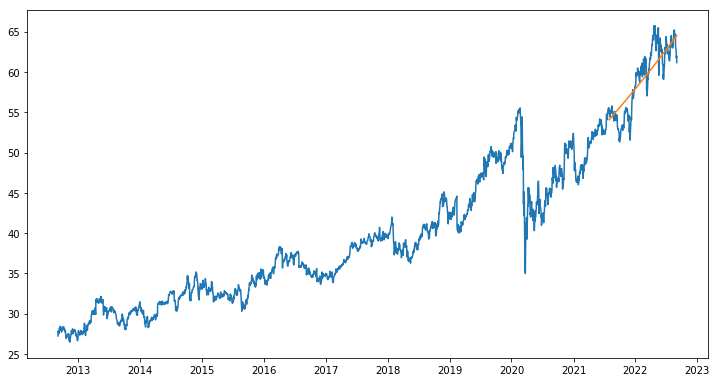

In [17]:
fig=plt.figure(figsize=(12.2,6.4))
plt.plot(df['Adj Close'],label='Trend')
plt.plot(test_pred,label='Trend')

In [18]:
end=dt.datetime.now()
start=dt.datetime(end.year-1,end.month,end.day)
price=reader.get_data_yahoo('MSFT',start,end)['Adj Close']
price=pd.DataFrame(price)
price

,Adj Close
Date,
2021-09-03,298.638916
2021-09-07,297.686859
2021-09-08,297.716614
2021-09-09,294.781189
2021-09-10,293.253967
...,...
2022-08-29,265.230011
2022-08-30,262.970001
2022-08-31,261.470001


In [19]:
df_w=price.resample(rule='D').mean()#same job weekly process
df_w

,Adj Close
Date,
2021-09-03,298.638916
2021-09-04,NaN
2021-09-05,NaN
2021-09-06,NaN
2021-09-07,297.686859
...,...
2022-08-29,265.230011
2022-08-30,262.970001
2022-08-31,261.470001


In [20]:
df=df_w['Adj Close'].interpolate(method="linear")#othwe method ex time still there
df.isnull().sum()
df

Date
2021-09-03    298.638916
2021-09-04    298.400902
2021-09-05    298.162888
2021-09-06    297.924873
2021-09-07    297.686859
                 ...    
2022-08-29    265.230011
2022-08-30    262.970001
2022-08-31    261.470001
2022-09-01    260.399994
2022-09-02    256.059998
Freq: D, Name: Adj Close, Length: 365, dtype: float64

In [21]:
#df=df.resample('MS').mean()
df=pd.DataFrame(df)
df

,Adj Close
Date,
2021-09-03,298.638916
2021-09-04,298.400902
2021-09-05,298.162888
2021-09-06,297.924873
2021-09-07,297.686859
...,...
2022-08-29,265.230011
2022-08-30,262.970001
2022-08-31,261.470001


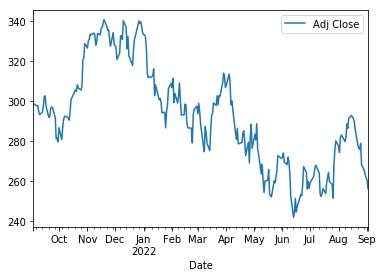

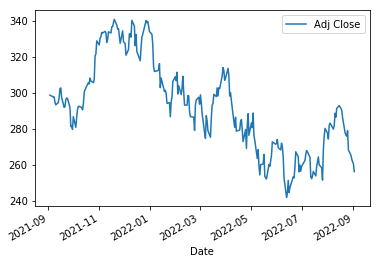

In [22]:
df.plot()
price.plot()

In [23]:
from statsmodels.tsa.seasonal import STL
stl=STL(df['Adj Close'],period=120)
Result = stl.fit()

In [24]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid
df['trend']=trend
df['Seasonal']=df['Adj Close']-trend-resid

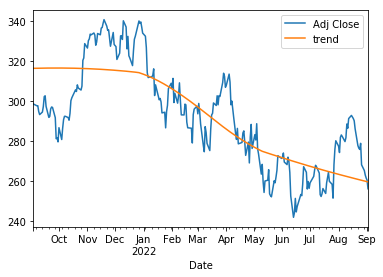

In [25]:
df[['Adj Close','trend']].plot()

In [26]:
train=df['trend'][:-100]
train

Date
2021-09-03    316.460748
2021-09-04    316.472629
2021-09-05    316.484086
2021-09-06    316.495115
2021-09-07    316.505710
                 ...    
2022-05-21    273.189539
2022-05-22    273.041530
2022-05-23    272.893737
2022-05-24    272.746127
2022-05-25    272.598677
Freq: D, Name: trend, Length: 265, dtype: float64

In [27]:
len(train)

265

In [28]:
#Holt Winters Model
hwmodel=ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=None).fit();

In [29]:
test_pred=hwmodel.forecast(100)
test_pred

2022-05-26    272.451528
2022-05-27    272.304524
2022-05-28    272.157632
2022-05-29    272.011042
2022-05-30    271.864488
                 ...    
2022-08-29    258.817350
2022-08-30    258.676209
2022-08-31    258.536366
2022-09-01    258.396808
2022-09-02    258.257387
Freq: D, Length: 100, dtype: float64

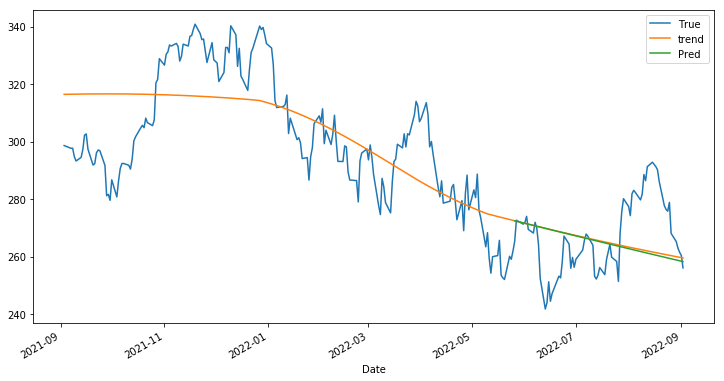

In [30]:
fig=plt.figure(figsize=(12.2,6.4))
plt.plot(df['Adj Close'],label='True')
df['trend'].plot()
plt.plot(test_pred,label='Pred')
plt.legend()
plt.show()

In [31]:
#Holt Winters Model
hwmodel=ExponentialSmoothing(df['Adj Close'][:-40],trend='Mul',seasonal='Mul',seasonal_periods=33).fit();

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
test_pred=hwmodel.forecast(40)
test_pred

2022-07-25    259.775373
2022-07-26    261.496547
2022-07-27    262.798953
2022-07-28    263.269750
2022-07-29    264.461348
2022-07-30    263.421087
2022-07-31    263.545845
2022-08-01    263.447620
2022-08-02    261.535566
2022-08-03    262.081024
2022-08-04    261.949438
2022-08-05    262.292491
2022-08-06    261.428656
2022-08-07    261.761439
2022-08-08    263.554582
2022-08-09    265.027392
2022-08-10    265.334627
2022-08-11    265.928170
2022-08-12    266.175506
2022-08-13    265.354015
2022-08-14    265.263764
2022-08-15    263.246603
2022-08-16    260.601262
2022-08-17    260.536273
2022-08-18    258.838550
2022-08-19    258.501273
2022-08-20    259.044093
2022-08-21    259.383556
2022-08-22    259.578282
2022-08-23    258.897390
2022-08-24    255.268436
2022-08-25    254.436450
2022-08-26    255.286545
2022-08-27    256.164756
2022-08-28    257.862007
2022-08-29    259.146312
2022-08-30    259.610565
2022-08-31    260.785600
2022-09-01    259.759798
2022-09-02    259.882822


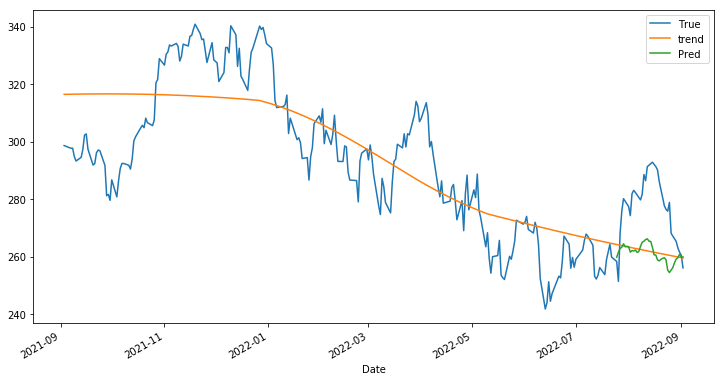

In [33]:
fig=plt.figure(figsize=(12.2,6.4))
plt.plot(df['Adj Close'],label='True')
df['trend'].plot()
plt.plot(test_pred,label='Pred')
plt.legend()
plt.show()

In [34]:
# We dont have a crear pattern in our seasonality thats why This seasonal model isn't applicable 